In [159]:
import pandas as pd
import numpy as np
import os
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
CN_DIR = "catslu_v2/preprocessed/audio"
EN_DIR = "smart-devices-en-fr"
CN_LM_DIR = "chinese_LM_data"
EN_LM_DIR = "en_LM_data"

In [35]:
def read_cn(dir):
    df = pd.read_csv(os.path.join(dir, 'train.csv'), header=0)
    df = df.dropna()
    return df

def read_en(dir):
    df_light_en = pd.read_csv(os.path.join(dir, "smart-lights-en-close.csv"), header=0)
    df_speaker_en = pd.read_csv(os.path.join(dir, "smart-speaker-en-close.csv"), header=0)
    df = pd.concat([df_light_en, df_speaker_en], ignore_index=True)
    return df

def read_cn_lm(dir):
    df1 = pd.read_csv(os.path.join(dir, "partition_A.csv"))
    df2 = pd.read_csv(os.path.join(dir, "partition_B.csv"))
    df3 = pd.read_csv(os.path.join(dir, "partition_C.csv"))
    df = pd.concat([df1, df2, df3], ignore_index=True)
    return df

def read_en_lm(dir):
    df1 = pd.read_csv(os.path.join(dir, "A_0_en.csv"))
    df2 = pd.read_csv(os.path.join(dir, "B_1_en.csv"))
    df3 = pd.read_csv(os.path.join(dir, "C_2_en.csv"))
    df4 = pd.read_csv(os.path.join(dir, "D_3_en.csv"))
    df = pd.concat([df1, df2, df3, df4], ignore_index=True)
    return df

In [70]:
df_cn = read_cn(CN_DIR)
df_en = read_en(EN_DIR)
df_cn_lm = read_cn_lm(CN_LM_DIR)
df_en_lm = read_en_lm(EN_LM_DIR)

In [71]:
cn_phones = df_cn['transcript'].to_numpy()

In [72]:
# Format cn phones. " a b c" -> "['a', 'b', 'c']"
temp = []
for sample in cn_phones:
    x = sample.split(" ")
    temp.append(x)
temp = np.array(temp, dtype=object)
cn_utterances = temp

In [73]:
en_utterances = df_en['phones'].apply(lambda x: literal_eval(x)).to_numpy()
cn_lm_utterances = df_cn_lm['phones'].apply(lambda x: literal_eval(x)).to_numpy()
en_lm_utterances = df_en_lm['phones'].apply(lambda x: literal_eval(x)).to_numpy()

In [119]:
def stat_length(utterances):
    # Print the average and the median length of utterances
    lengths = []
    for sample in utterances:
        lengths.append(len(sample))
    mean_len, med_len = np.mean(lengths), np.median(lengths)
    print("Average length of utterances is {}, median length is {}".format(mean_len, med_len))
    return lengths

In [80]:
def count_phones(utterances):
    phone_freq = {}
    for sample in utterances:
        for phone in sample:
            if phone not in phone_freq:
                phone_freq[phone] = 0
            phone_freq[phone] += 1
    return phone_freq

In [120]:
cn_lens = stat_length(cn_utterances)
cn_freq = count_phones(cn_utterances)

Average length of utterances is 16.47481910274964, median length is 16.0


In [121]:
en_lens = stat_length(en_utterances)
en_freq = count_phones(en_utterances)

Average length of utterances is 23.506466984343092, median length is 23.0


In [122]:
cn_lm_lens = stat_length(cn_lm_utterances)
cn_lm_freq = count_phones(cn_lm_utterances)

Average length of utterances is 83.8419, median length is 84.0


In [123]:
en_lm_lens = stat_length(en_lm_utterances)
en_lm_freq = count_phones(en_lm_utterances)

Average length of utterances is 62.947917920327356, median length is 50.0


In [89]:
cn_freq = dict(sorted(cn_freq.items(), key=lambda item: item[1], reverse=True))
en_freq = dict(sorted(en_freq.items(), key=lambda item: item[1], reverse=True))
cn_lm_freq = dict(sorted(cn_lm_freq.items(), key=lambda item: item[1], reverse=True))
en_lm_freq = dict(sorted(en_lm_freq.items(), key=lambda item: item[1], reverse=True))

In [97]:
def get_plot_df(freq, most_freq=None):
    df = pd.DataFrame(freq.items(), columns=['phone', 'count'])
    if most_freq:
        # Only get the most frequent phones
        df = df[:most_freq]
    return df

In [109]:
cn_freq_df = get_plot_df(cn_freq, 20)
en_freq_df = get_plot_df(en_freq, 20)
cnlm_freq_df = get_plot_df(cn_lm_freq, 20)
enlm_freq_df = get_plot_df(en_lm_freq, 20)
cn_freq_df

,phone,count
0,a,11569
1,i,6323
2,ɒ,5532
3,n,4589
4,o,4576
5,ɪ,4275
6,uə,3916
7,ɴ,2833
8,ə,2699
9,m,2622


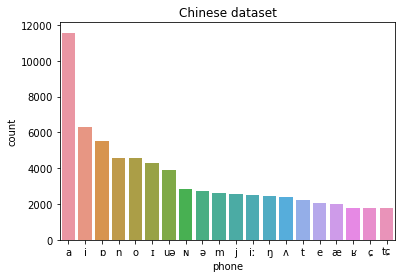

In [140]:
plot = sns.barplot(x="phone", y="count", data=cn_freq_df).set_title("Chinese dataset")
plot.figure.savefig("phone_cn.png")

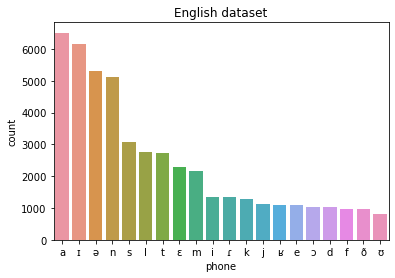

In [141]:
plot = sns.barplot(x="phone", y="count", data=en_freq_df).set_title("English dataset")
plot.figure.savefig("phone_en.png")

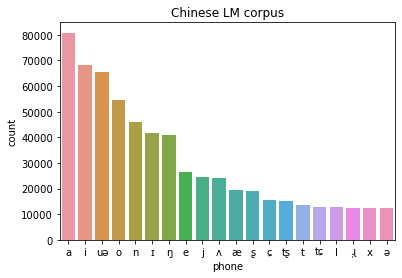

In [142]:
plot = sns.barplot(x="phone", y="count", data=cnlm_freq_df).set_title("Chinese LM corpus")
plot.figure.savefig("phone_cnlm.png")

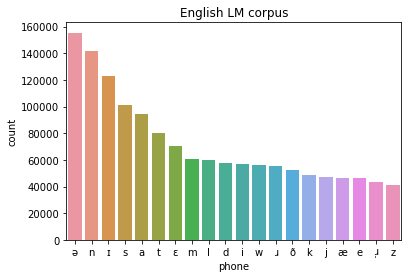

In [143]:
plot = sns.barplot(x="phone", y="count", data=enlm_freq_df).set_title("English LM corpus")
plot.figure.savefig("phone_enlm.png")

In [124]:
def get_len_df(lengths):
    df = pd.DataFrame(lengths, columns=['length'])
    return df

In [132]:
cn_lens_df = get_len_df(cn_lens)
en_lens_df = get_len_df(en_lens)
cnlm_lens_df = get_len_df(cn_lm_lens)
enlm_lens_df = get_len_df(en_lm_lens)

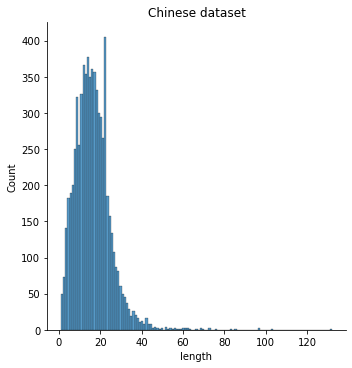

In [161]:
sns.displot(cn_lens_df, x="length")
plt.title("Chinese dataset")
plt.savefig("lens_cn.png", bbox_inches='tight')

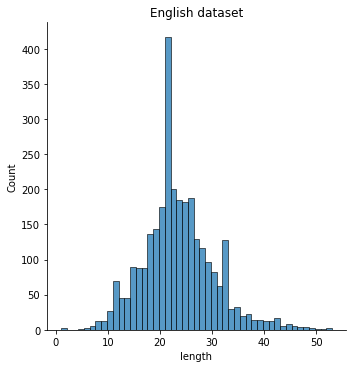

In [162]:
sns.displot(en_lens_df, x="length")
plt.title("English dataset")
plt.savefig("lens_en.png", bbox_inches='tight')

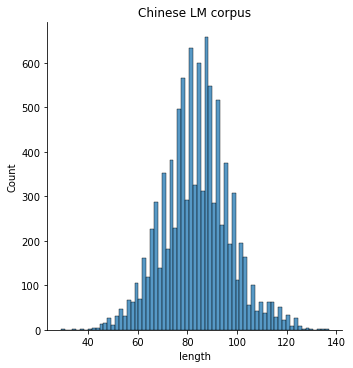

In [163]:
sns.displot(cnlm_lens_df, x="length")
plt.title("Chinese LM corpus")
plt.savefig("lens_cnlm.png", bbox_inches='tight')

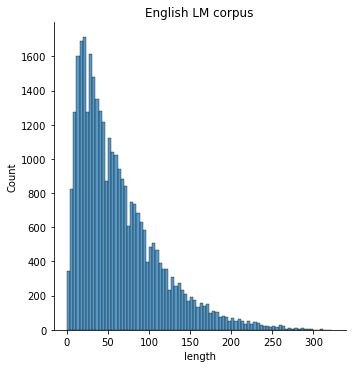

In [164]:
sns.displot(enlm_lens_df, x="length")
plt.title("English LM corpus")
plt.savefig("lens_enlm.png", bbox_inches='tight')